In [1]:
import stats_funcs.funcs as fs #In this module you will find the sampler and the linear interpolation
import stats_funcs.stats as st #Here you shall find a series of basic statistics
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

# Exercise 1

## Item a)

Here we are creating three distributions. The first is a uniform distribution with values between zero and one. The second is a normal distribution within the same range. Finally, we have a skewed distribution based on the same sample.

In [3]:
mu = 0
sigma = 1
x_0 = 0.1

x = np.random.uniform(-4, 4, 100)

gaussian = fs.gaussian_distribution(mu, sigma, size = 100, x_min = 0, x_max = 1)

skew = fs.skewed_distribution(x_0, sigma, size = 100)

/home/corbanez/Projects/practical_data_analysis/stats_funcs/funcs.py:46: RuntimeWarning: divide by zero encountered in double_scalars
  a_i = (x[i+1] - x[i])/(cdf_x[i+1] - cdf_x[i])


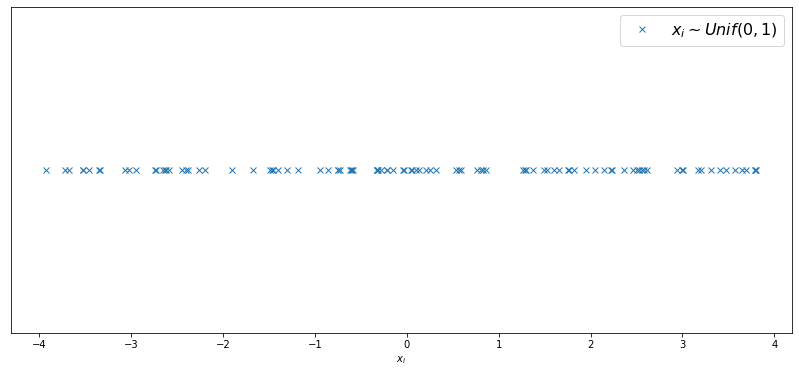

In [4]:
plt.plot(x, len(x)*[1], 'x', label = '${x_i} \sim Unif(0,1)$')
plt.xlabel('${x_i}$')
plt.yticks([])
plt.legend(prop={'size': 16})

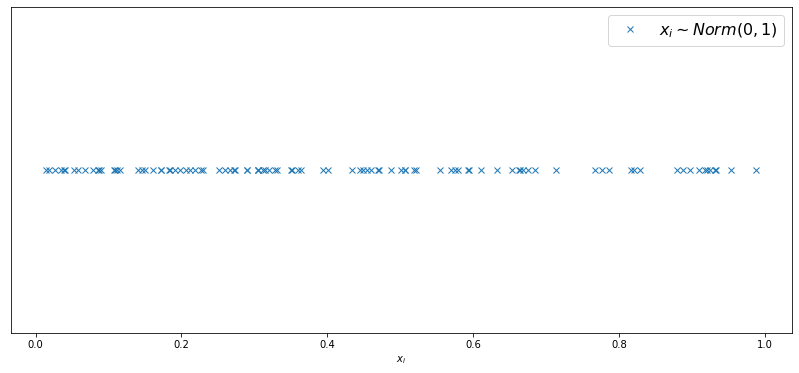

In [5]:
plt.plot(gaussian, len(gaussian)*[1], 'x', label = '${x_i} \sim Norm(0,1)$')
plt.xlabel('${x_i}$')
plt.yticks([])
plt.legend(prop={'size': 16})

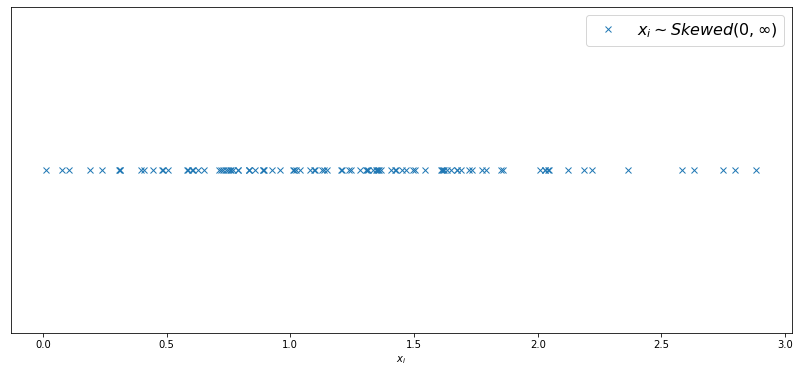

In [6]:
plt.plot(skew, len(skew)*[1], 'x', label = '${x_i} \sim Skewed(0, \infty)$')
plt.xlabel('${x_i}$')
plt.yticks([])
plt.legend(prop={'size': 16})

## Itens b) and c)

In [7]:
rcParams['figure.figsize'] = 12, 6


from scipy.integrate import quad

Text(0.5, 1.0, 'Relative Diference for a Uniform Distribution')

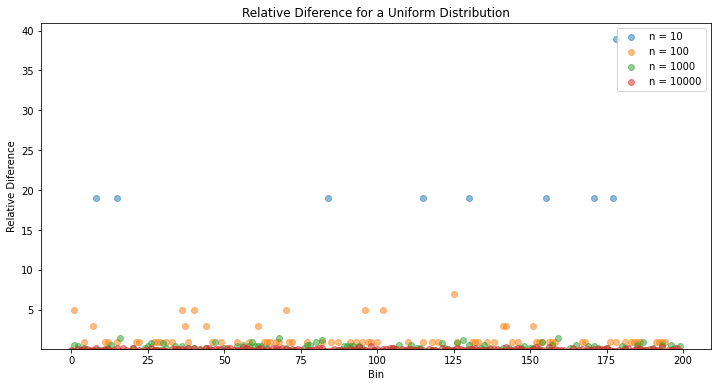

In [8]:
_n = [10, 100, 1000, 10000]

for n in _n:

    relative_diference = ([])

    uniform = np.random.uniform(0, 1, n)

    uniform_intervals = {}
    interval = np.arange(0, 1.005, 0.005)

    for idx in range(len(interval)-1):
        uniform_intervals[idx] = [0, n*(interval[idx+1]-interval[idx])]
        for x in uniform:
            if x>=interval[idx] and x<=interval[idx+1]:
                uniform_intervals[idx][0] += 1
                
    for key in uniform_intervals:
        relative_diference = np.append(relative_diference, (uniform_intervals[key][0]/uniform_intervals[key][1]) - 1)
    
    plt.scatter(list(uniform_intervals.keys()), relative_diference, alpha = 0.5,label = f'n = {n}')

plt.ylim(bottom= 0.1) #This is to take all uncalculated bins from the plot
plt.legend()
plt.ylabel('Relative Diference')
plt.xlabel('Bin')
plt.title('Relative Diference for a Uniform Distribution')

Text(0.5, 1.0, 'Relative Diference for a Gaussian Distribution')

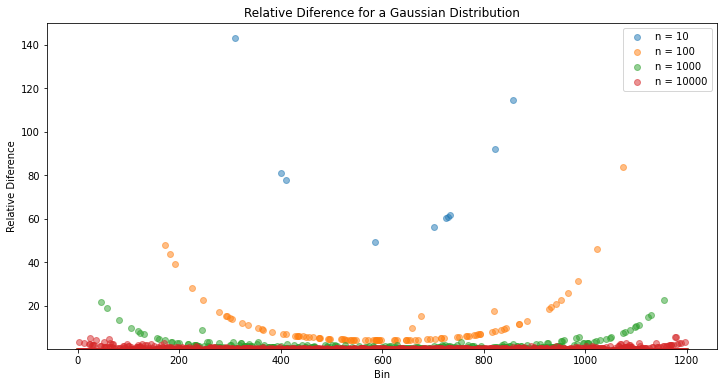

In [9]:
for n in _n:

    relative_diference = ([])

    mu = 0
    sigma = 1

    gaussian = fs.gaussian_distribution(mu, sigma, size = n, x_min = -3, x_max = 3)

    gaussian_intervals = {}
    interval = np.arange(-3, 3.005, 0.005)

    for idx in range(len(interval)-1):
        gaussian_intervals[idx] = [0, n*quad(fs.gaussian, interval[idx], interval[idx+1], (mu, sigma))[0]]
        for x in gaussian:
            if x>=interval[idx] and x<=interval[idx+1]:
                gaussian_intervals[idx][0] += 1

    for key in gaussian_intervals:
        relative_diference = np.append(relative_diference, gaussian_intervals[key][0]/gaussian_intervals[key][1] - 1)
    
    plt.scatter(list(gaussian_intervals.keys()), relative_diference, alpha = 0.5,label = f'n = {n}')
    
plt.ylim(bottom= 0.1) #This is to take all uncalculated bins from the plot
plt.legend()
plt.ylabel('Relative Diference')
plt.xlabel('Bin')
plt.title('Relative Diference for a Gaussian Distribution')

Text(0.5, 1.0, 'Relative Diference for a Skewed Distribution')

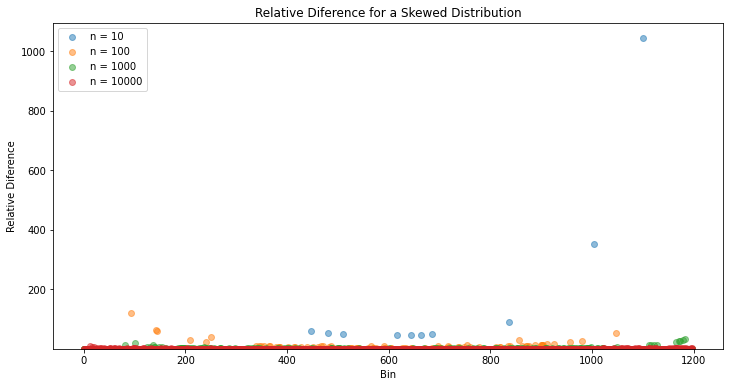

In [10]:
for n in _n:

    relative_diference = ([])

    sigma = 1
    x_0 = 3

    skew = fs.skewed_distribution(x_0, sigma, size = n)

    skewed_intervals = {}
    interval = np.arange(x_0-3*sigma, x_0+3*sigma, 0.005)

    for idx in range(len(interval)-1):
        skewed_intervals[idx] = [0, n*quad(fs.some_random_function, interval[idx], interval[idx+1], (x_0, sigma))[0]]
        for x in skew:
            if x>=interval[idx] and x<=interval[idx+1]:
                skewed_intervals[idx][0] += 1
                
    for key in skewed_intervals:
            relative_diference = np.append(relative_diference, skewed_intervals[key][0]/skewed_intervals[key][1] - 1)

    plt.scatter(list(skewed_intervals.keys()), relative_diference, alpha = 0.5,label = f'n = {n}')

plt.ylim(bottom= 0.005) #This is to take all uncalculated bins from the plot
plt.legend()
plt.ylabel('Relative Diference')
plt.xlabel('Bin')
plt.title('Relative Diference for a Skewed Distribution')

For a given **n**, the relative difference tends to be higher on less probable values. Moreover, as **n** grows those extreme values for the relative difference tend to *flat out*.

# Exercise 2

Text(0, 0.5, 'Mean value')

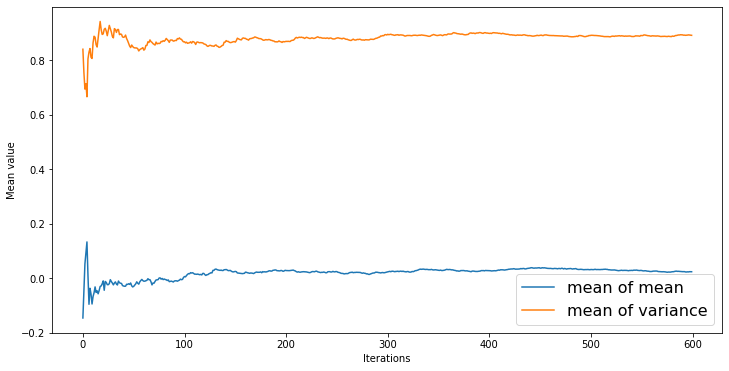

In [11]:
mu = 0
sigma = 1
N = 10

array_x = ([])
array_V = ([])

mean_x = ([])
mean_V = ([])

_t = ([])

for t in range(600):
    _t = np.append(_t, t)
    
    gaussian = np.random.normal(mu, sigma, N) 
    # gaussian = fs.gaussian_distribution(mu, sigma, size = N)
     
    _x = sum(gaussian)/N
    array_x = np.append(array_x, _x)
    
    mean_x = np.append(mean_x, sum(array_x)/len(array_x))
    
    _V = sum((gaussian - _x)**2)/N
    array_V = np.append(array_V, _V) 
    
    mean_V = np.append(mean_V, sum(array_V)/len(array_V))
    
plt.plot(_t, mean_x, label = 'mean of mean')
plt.plot(_t, mean_V, label = 'mean of variance')
plt.legend(prop={'size': 16})

plt.xlabel('Iterations')
plt.ylabel('Mean value')

Here we se the law of large numbers in action. According to the law, the average of the results obtained from a large number of trials should be close to the expected value. As we can see, the mean value of means is closing in to the expected value $\mu$. However, the mean value of variance does not have the same behaviour... Don´t really know why **ಠ_ಠ**. 

I tested the unbiased variance, but no significant change was seen.

# Exercise 3

In [12]:
# Setting a wider graph

rcParams['figure.figsize'] = 20, 12

In [13]:
from scipy.stats import kurtosis, skew

In [14]:
sigma = 1
_k = ([])
_s = ([])
# _N = ([10, 100, 1000, 10000])
_N = np.arange(10, 10000, 10)

try:
    
    print('Using pickled arrays')
    
    _k = pickle.load(open(r'pickle/kurtosis_plot.pkl', 'rb'))
    _s = pickle.load(open(r'pickle/skewness_plot.pkl', 'rb'))
    
except FileNotFoundError:
    
    print('Pickle not found. Recalculating array...')
    for N in _N:
        skew_dist = fs.skewed_distribution(0.5, sigma, size = N, x_min = 0, x_max = 10)
        k = kurtosis(skew_dist)
        s = skew(skew_dist)
        _k = np.append(_k, k)
        _s = np.append(_s, skew(skew_dist))

    with open(r'pickle/kurtosis_plot.pkl', 'wb') as f:
        pickle.dump(_k, f)
    with open(r'pickle/skewness_plot.pkl', 'wb') as f:
        pickle.dump(_k, f)

Using pickled arrays


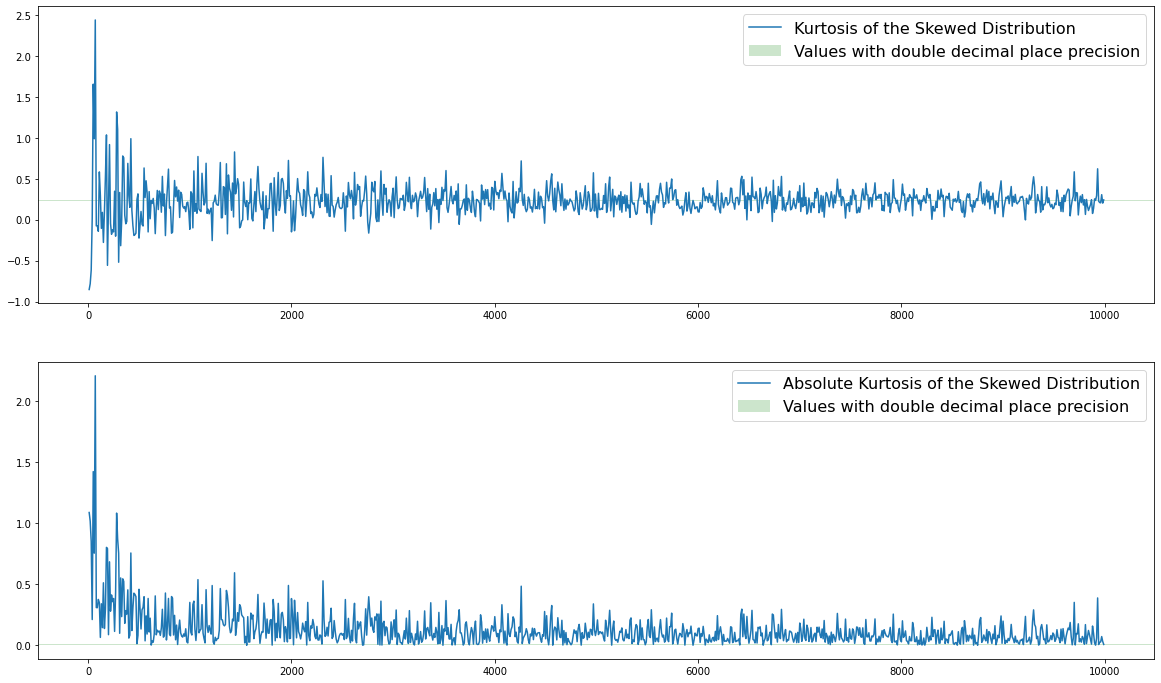

In [15]:
fig, axs = plt.subplots(2)

axs[0].plot(_N, _k, label = 'Kurtosis of the Skewed Distribution')
axs[0].axhspan(st.mean(_k) + 0.01,st.mean(_k) - 0.01, facecolor = 'g', alpha = 0.2, label = 'Values with double decimal place precision')
axs[0].legend(prop={'size': 16})

axs[1].plot(_N, abs(_k - st.mean(_k)), label = 'Absolute Kurtosis of the Skewed Distribution')
axs[1].axhspan(0.01, 0, facecolor = 'g', alpha = 0.2, label = 'Values with double decimal place precision')
axs[1].legend(prop={'size': 16})


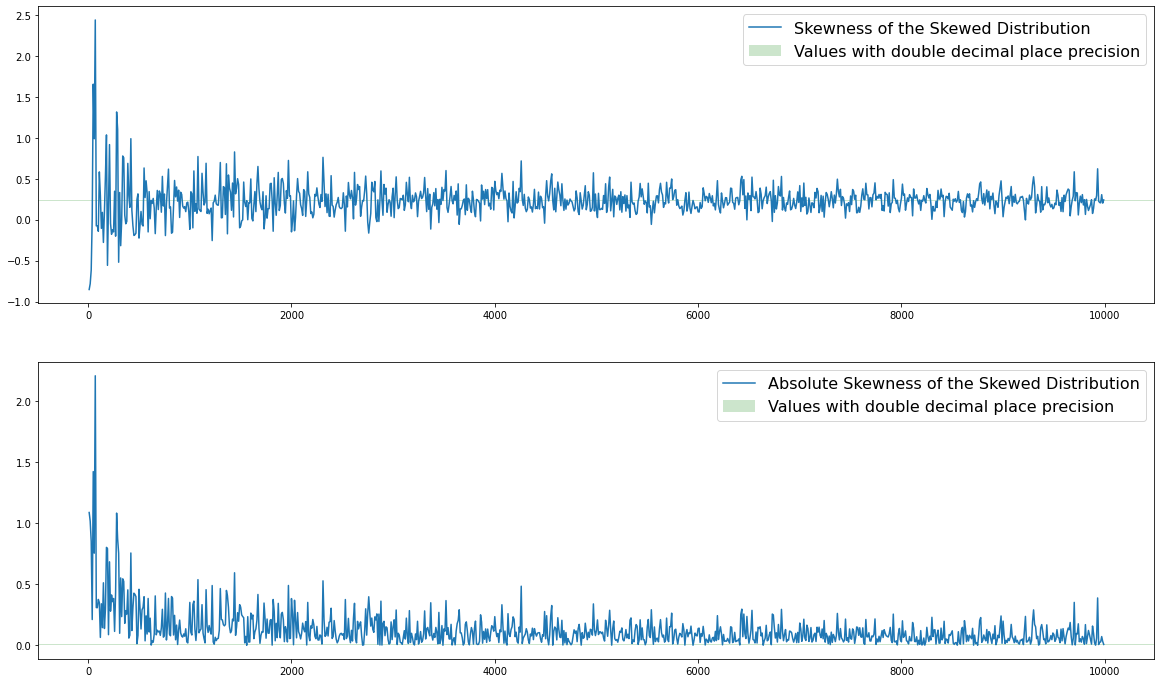

In [16]:
fig, axs = plt.subplots(2)

axs[0].plot(_N, _s, label = 'Skewness of the Skewed Distribution')
axs[0].axhspan(st.mean(_s) + 0.01,st.mean(_s) - 0.01, facecolor = 'g', alpha = 0.2, label = 'Values with double decimal place precision')
axs[0].legend(prop={'size': 16})

axs[1].plot(_N, abs(_s - st.mean(_s)), label = 'Absolute Skewness of the Skewed Distribution')
axs[1].axhspan(0.01, 0, facecolor = 'g', alpha = 0.2, label = 'Values with double decimal place precision')
axs[1].legend(prop={'size': 16})

# Exercise 4

## Item a)

In [17]:
rcParams['figure.figsize'] = 20, 6

In [18]:
mu = 0
sigma = 1

_cor = ([])
_cov = ([])
_N = np.arange(10, 5000, 5)

for N in _N:

    x = np.random.uniform(0, 1, N)
    gaussian = np.random.normal(mu, sigma, size = N)
    # gaussian = fs.gaussian_distribution(mu, sigma, size = N)

    _cov = np.append(_cov, st.covariance(x, gaussian))
    _cor = np.append(_cor, st.correlation(x, gaussian))

Text(0, 0.5, 'Covariance')

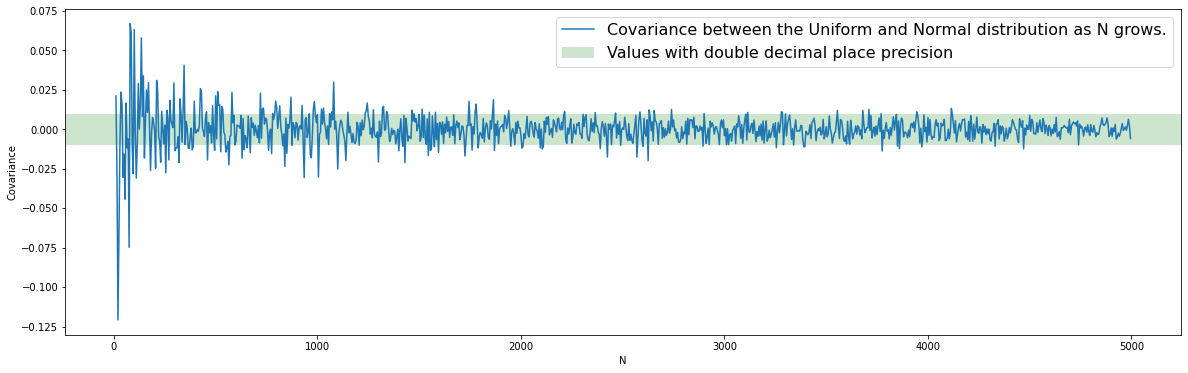

In [19]:
plt.plot(_N, _cov, label = 'Covariance between the Uniform and Normal distribution as N grows.')
plt.axhspan(0.01,-0.01, facecolor = 'g', alpha = 0.2, label = 'Values with double decimal place precision')
plt.legend(prop={'size': 16})
plt.xlabel('N')
plt.ylabel('Covariance')


Text(0, 0.5, 'Correlation')

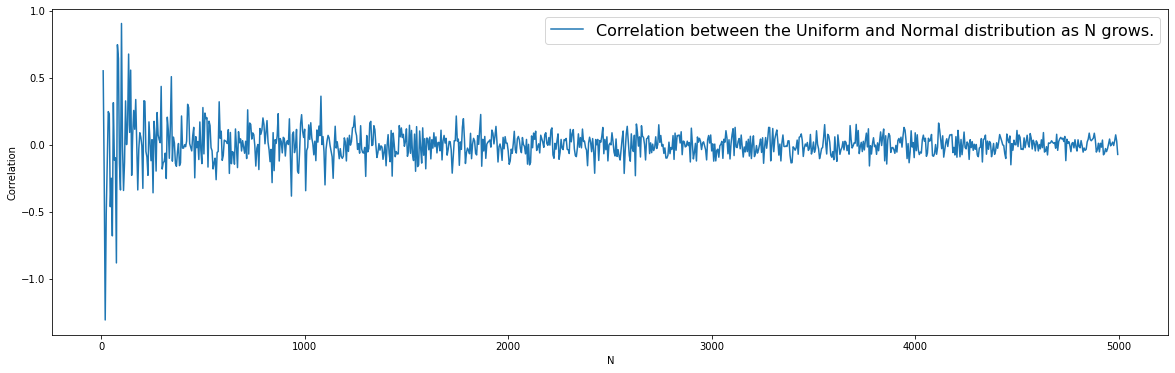

In [20]:
plt.plot(_N, _cor, label = 'Correlation between the Uniform and Normal distribution as N grows.')
plt.legend(prop={'size': 16})
plt.xlabel('N')
plt.ylabel('Correlation')

## Item b)

With $\{x_i\} \sim Unif(0,1)$ and $\{y_i\} \sim Norm(0,1)$, we shall now calculate the covariance and correlation between $\{x_i, y_i - x_i\}$ and $\{x_i, y_i + x_i\}$ respectively.

In [21]:
mu = 0
sigma = 1

_cor2 = ([])
_cov2 = ([])

for N in _N:

    x = np.random.uniform(0, 1, N)


    gaussian = np.random.normal(mu, sigma, size = N)
    # gaussian = fs.gaussian_distribution(mu, sigma, size = N)

    _cov2 = np.append(_cov2, st.covariance(x, gaussian - x))
    _cor2 = np.append(_cor2, st.correlation(x, gaussian - x))

Text(0, 0.5, 'Covariance')

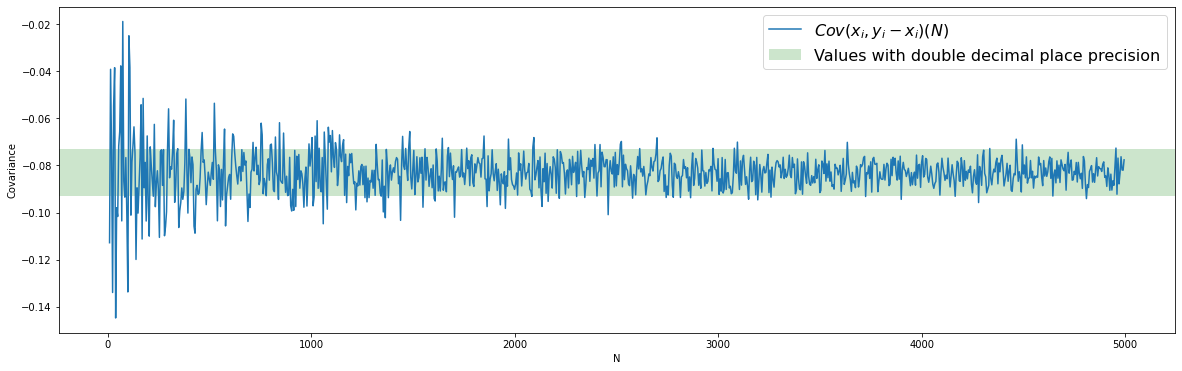

In [22]:
plt.plot(_N, _cov2, label = '$Cov(x_i, y_i - x_i)(N)$')
plt.axhspan(st.mean(_cov2) + 0.01, st.mean(_cov2)  - 0.01, facecolor = 'g', alpha = 0.2, label = 'Values with double decimal place precision')
plt.legend(prop={'size': 16})
plt.xlabel('N')
plt.ylabel('Covariance')

Text(0, 0.5, 'Correlation')

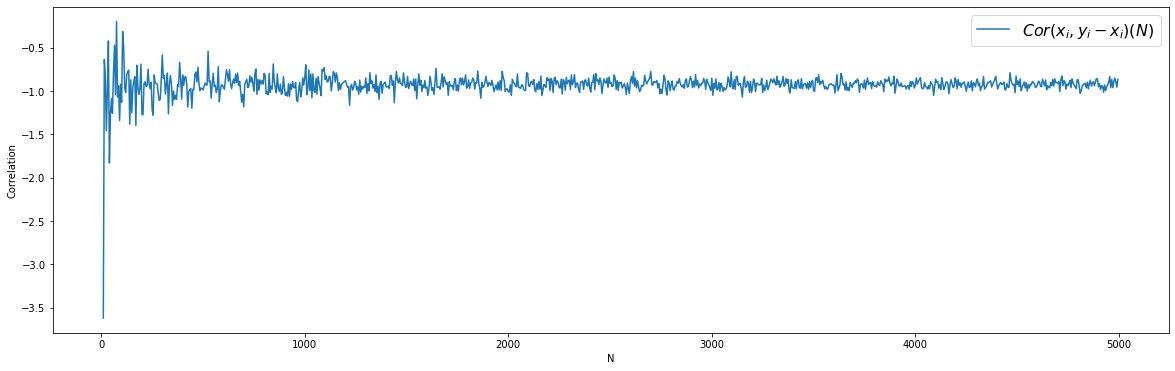

In [23]:
plt.plot(_N, _cor2, label = '$Cor(x_i, y_i - x_i)(N)$')
plt.legend(prop={'size': 16})
plt.xlabel('N')
plt.ylabel('Correlation')

In [24]:
mu = 0
sigma = 1

_cor3 = ([])
_cov3 = ([])

for N in _N:

    x = np.random.uniform(0, 1, N)
    gaussian = np.random.normal(mu, sigma, size = N)
    # gaussian = fs.gaussian_distribution(mu, sigma, size = N)

    _cov3 = np.append(_cov3, st.covariance(x, gaussian + x))
    _cor3 = np.append(_cor3, st.correlation(x, gaussian + x))

Text(0, 0.5, 'Covariance')

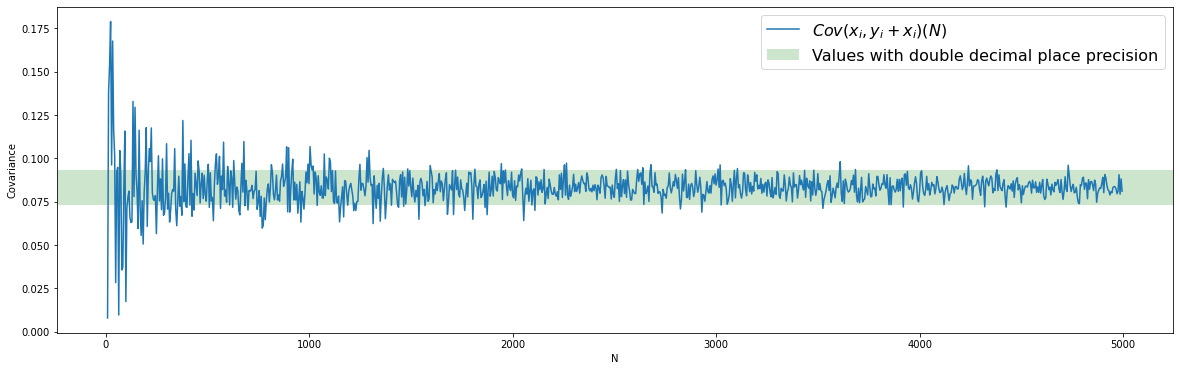

In [25]:
plt.plot(_N, _cov3, label = '$Cov(x_i, y_i + x_i)(N)$')
plt.axhspan(st.mean(_cov3) + 0.01, st.mean(_cov3)  - 0.01, facecolor = 'g', alpha = 0.2, label = 'Values with double decimal place precision')
plt.legend(prop={'size': 16})
plt.xlabel('N')
plt.ylabel('Covariance')

Text(0, 0.5, 'Correlation')

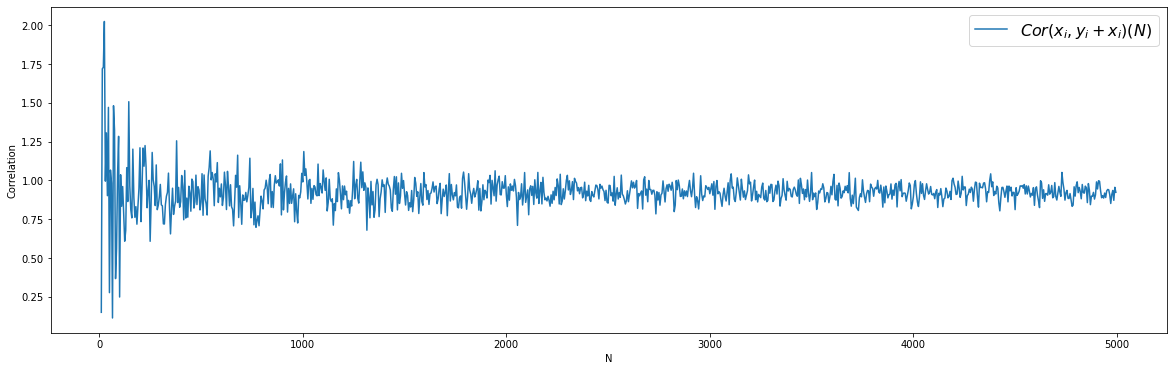

In [26]:
plt.plot(_N, _cor3, label = '$Cor(x_i, y_i + x_i)(N)$')
plt.legend(prop={'size': 16})
plt.xlabel('N')
plt.ylabel('Correlation')

## Item c)

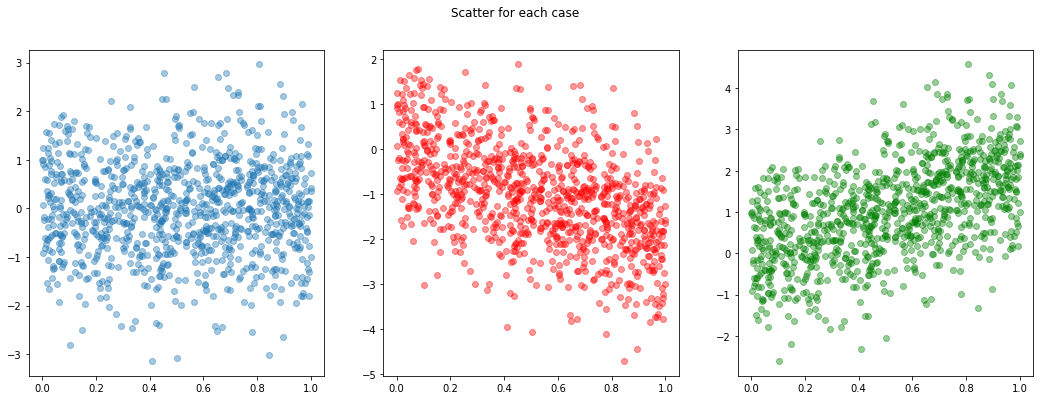

In [27]:
rcParams['figure.figsize'] = 18, 6

x = np.random.uniform(0, 1, 1000)
gaussian = np.random.normal(mu, sigma, 1000)
# gaussian = fs.gaussian_distribution(mu, sigma, size = 1000)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Scatter for each case')
ax1.scatter(x, gaussian, alpha = 0.4)
ax2.scatter(x, gaussian - 2*x, c = 'r', alpha = 0.4)
ax3.scatter(x, gaussian + 2*x, c = 'g', alpha = 0.4)

# Exercise 5

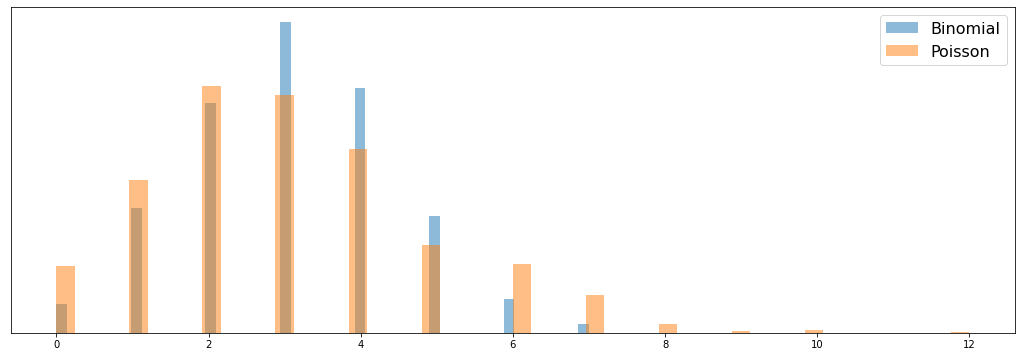

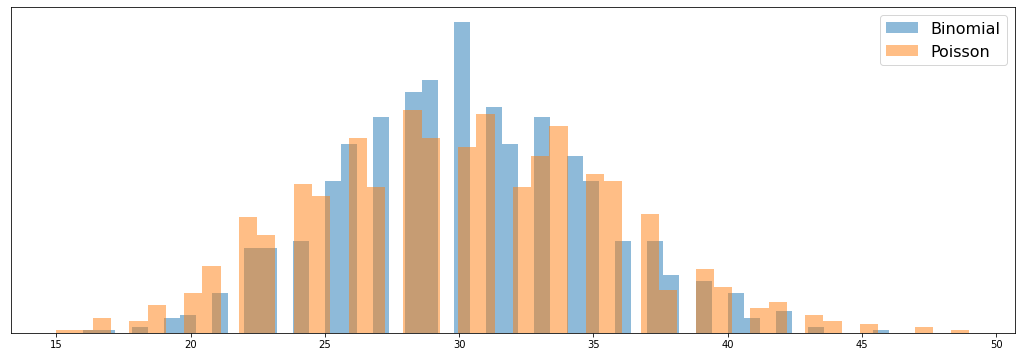

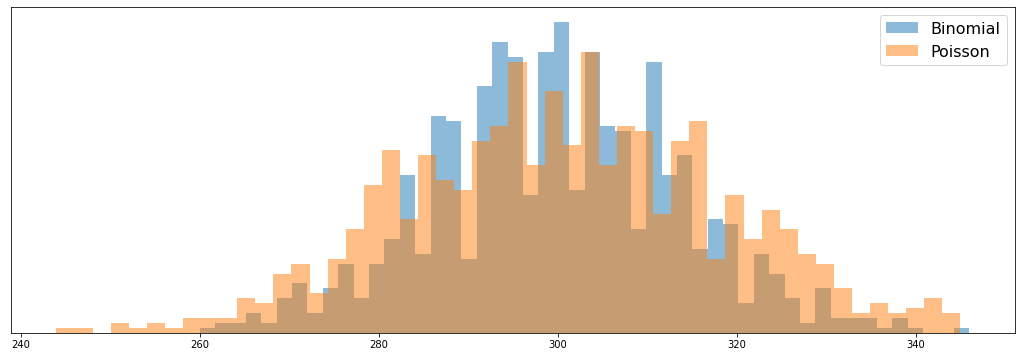

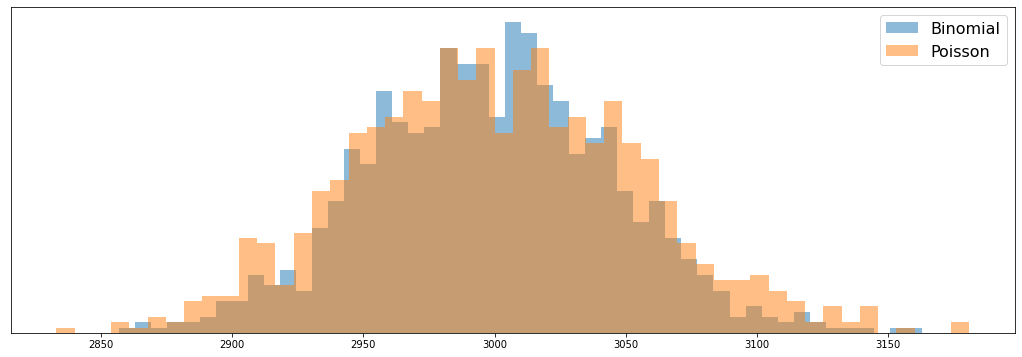

In [28]:
p = 0.3
N = 1000

for n in [10, 100, 1000, 10000]:  
    binomial = np.random.binomial(n, p, N)
    #Given lambda = p*n
    poisson = np.random.poisson(p*n, N)
    plt.hist(binomial, 50, alpha = 0.5, label = 'Binomial')
    plt.hist(poisson, 50, alpha = 0.5, label = 'Poisson')
    plt.yticks([])
    plt.legend(prop={'size': 16})
    plt.show()

The Poisson distribution is the limit of the binomial distribution
for large n.

# Exercise 6

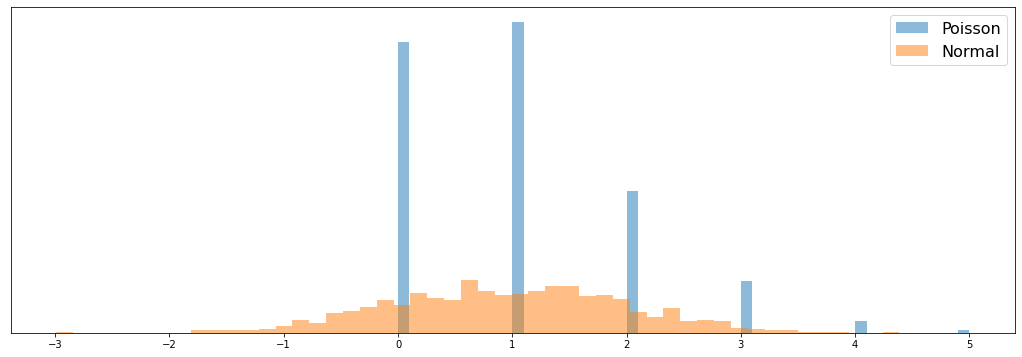

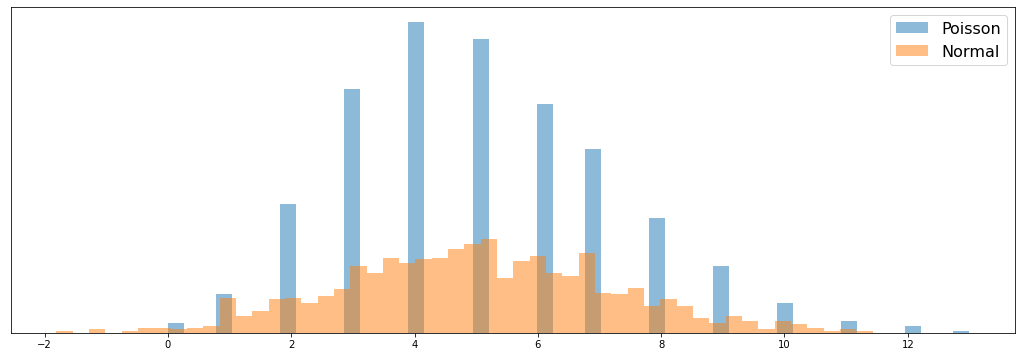

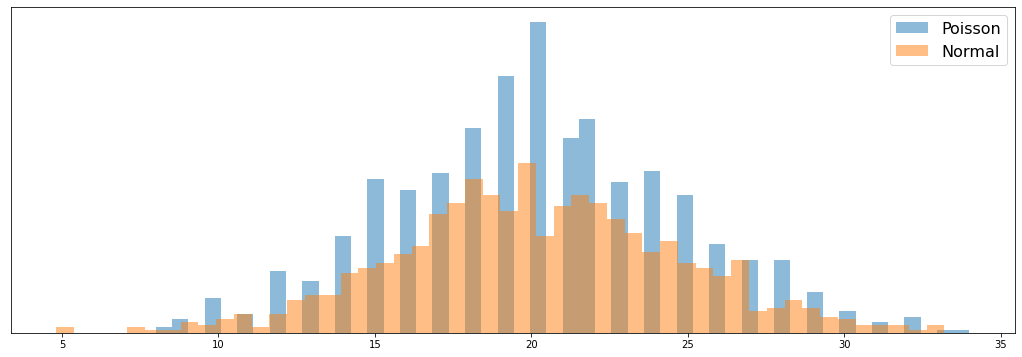

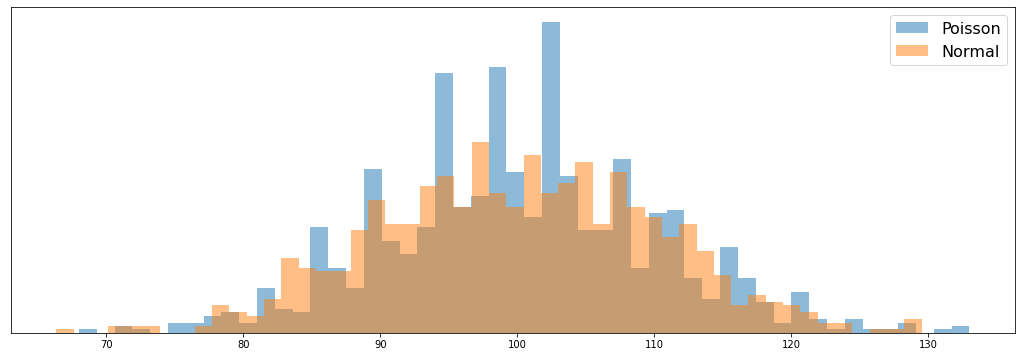

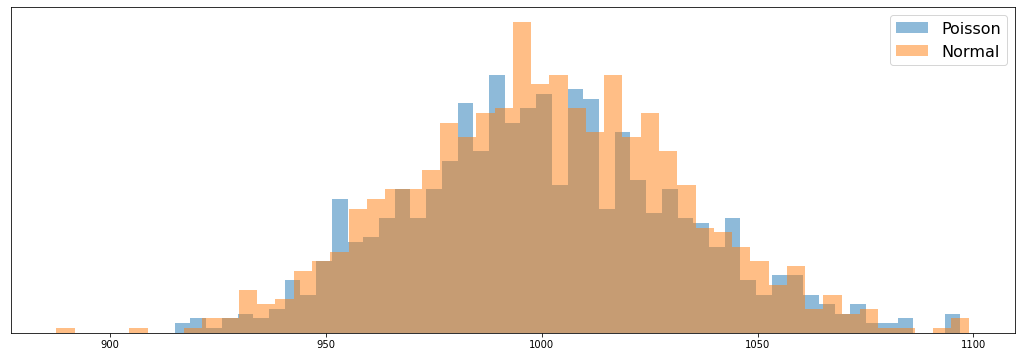

In [29]:
N = 1000

for l in [1, 5, 20, 100, 1000]:
    poisson = np.random.poisson(l, N)
    gaussian = np.random.normal(l, np.sqrt(l), N)
    plt.hist(poisson, 50, alpha = 0.5, label = 'Poisson')
    plt.hist(gaussian, 50, alpha = 0.5, label = 'Normal')
    plt.yticks([])
    plt.legend(prop={'size': 16})
    plt.show()

# Exercise 7

The multivariate integral proposed in the exercise can be solved analytically after the substitution for $\chi$. Solving the probability for any $\chi$ results in
$$
P(\chi) = 1 - e^{-\frac{\chi^2}{2}}
$$

In [30]:
def p_chi(chi):
    return 1 - np.exp((-chi**2)/2)

print(f'1-sigma: {p_chi(1)} = {round(p_chi(1)*100)}%')
print(f'2-sigma: {p_chi(2)} = {round(p_chi(2)*100)}%')
print(f'3-sigma: {p_chi(3)} = {round(p_chi(3)*100)}%')

1-sigma: 0.3934693402873666 = 39%
2-sigma: 0.8646647167633873 = 86%
3-sigma: 0.9888910034617577 = 99%


In [31]:
mu1 = 3
sigma1 = 1

mu2 = -1
sigma2 = 1

gaussian_x = np.random.normal(mu1, sigma1, 10000)
gaussian_y = np.random.normal(mu2, sigma2, 10000)

# gaussian_x = fs.gaussian_distribution(mu1, sigma1, 10000)
# gaussian_y = fs.gaussian_distribution(mu2, sigma2, 10000)

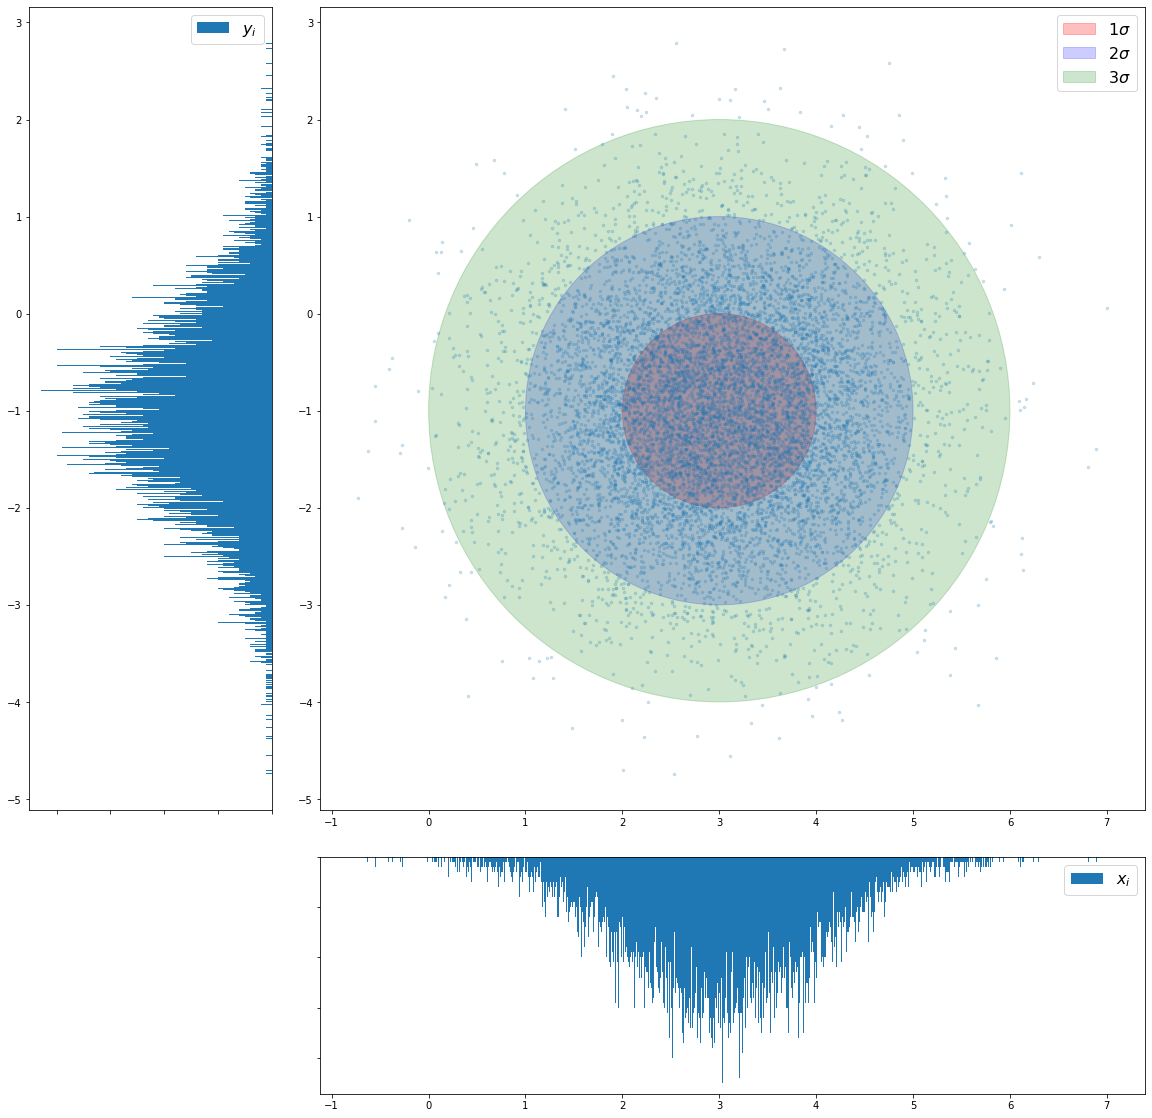

In [32]:
# Set up the axes with gridspec
fig = plt.figure(figsize=(20, 20))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

circle1 = plt.Circle((mu1, mu2), 1, color = 'r', alpha = 0.25, label = '$1\sigma$')
circle2 = plt.Circle((mu1, mu2), 2, color = 'b', alpha = 0.2, label = '$2\sigma$')
circle3 = plt.Circle((mu1, mu2), 3, color = 'g', alpha = 0.2, label = '$3\sigma$')

# scatter points on the main axes
main_ax.add_patch(circle1)
main_ax.add_patch(circle2)
main_ax.add_patch(circle3)
main_ax.plot(gaussian_x, gaussian_y, 'o', markersize=2.5, alpha=0.2)
main_ax.legend(prop={'size': 16})

# histogram on the attached axes
x_hist.hist(gaussian_x, 1000, orientation='vertical', label = '${x_i}$')
x_hist.invert_yaxis()
x_hist.legend(prop={'size': 16})

y_hist.hist(gaussian_y, 1000, orientation='horizontal', label = '${y_i}$')
y_hist.invert_xaxis()
y_hist.legend(prop={'size': 16})

# Exercise 9

I've created the following estimators in a separe module:

* $\hat{\mu}_1 = \sum_{i=1}^N \frac{x_i}{N}$;

* $\hat{\mu}_2 = \sum_{i=1}^{Min(N, 10)} \frac{x_i}{Min(N, 10)}$;

* $\hat{\mu}_3 = \sum_{i=1}^N \frac{x_i}{N-1}$;

* $\hat{\mu}_4 = 1,8$;

* $\hat{\mu}_5 = \left( \prod_{i=1}^N x_i\right)^\frac{1}{N}$;

* $\hat{\mu}_6 = x_p$, where $x_p$ is the most frequent value of $\{x_i\}$;

* $\hat{\mu}_7 = \frac{Max(\{x_i\}) + Min(\{x_i\})}{2}$;

* $\hat{\mu}_8 = \sum_{i=1}^{|\underline{N/2}|} \frac{x_{2i}}{|\underline{N/2}|}$, where $|\underline{N/2}| = \frac{N}{2}$ for even $N$, and $|\underline{N/2}| = \frac{(N-1)}{2}$ for odd values.

In [33]:
from stats_funcs import estimators

In [34]:
mu = 0
sigma = 1
x_0 = 1

uniform = np.random.uniform(0, 1, 1000)

gaussian = fs.gaussian_distribution(mu, sigma, size = 1000)

skew = fs.skewed_distribution(x_0, sigma, size = 10000)

/home/corbanez/Projects/practical_data_analysis/stats_funcs/funcs.py:46: RuntimeWarning: divide by zero encountered in double_scalars
  a_i = (x[i+1] - x[i])/(cdf_x[i+1] - cdf_x[i])


## Consistency

### Consistency check for the uniform distribution

In [35]:
print('Uniform Distribution:')

print('one(Unif) - mean(Unif): ', estimators.one(uniform) - st.mean(uniform))
print('two(Unif) - mean(Unif): ', estimators.two(uniform) - st.mean(uniform))
print('three(Unif) - mean(Unif): ', estimators.three(uniform) - st.mean(uniform))
print('four(Unif) - mean(Unif): ', estimators.four(uniform) - st.mean(uniform))
print('five(Unif) - mean(Unif): ', estimators.five(uniform) - st.mean(uniform))
print('six(Unif) - mean(Unif): ', estimators.six(uniform) - st.mean(uniform))
print('seven(Unif) - mean(Unif): ', estimators.seven(uniform) - st.mean(uniform))
print('eight(Unif) - mean(Unif): ', estimators.eight(uniform) - st.mean(uniform))

Uniform Distribution:
one(Unif) - mean(Unif):  0.0
two(Unif) - mean(Unif):  49.37146885585292
three(Unif) - mean(Unif):  0.0004992009065212244
four(Unif) - mean(Unif):  1.3012982943853242
five(Unif) - mean(Unif):  -0.49870170561467597
six(Unif) - mean(Unif):  -0.4962351071855712
seven(Unif) - mean(Unif):  0.0012888431265449807
eight(Unif) - mean(Unif):  0.0077672268922895915


Estimator one, three and seven are consistent for a uniform distribution.

### Consistency check for the normal distribution

In [36]:
print('Normal Distribution:')

print('one(Norm) - mean(Norm): ', estimators.one(gaussian) - st.mean(gaussian))
print('two(Norm) - mean(Norm): ', estimators.two(gaussian) - st.mean(gaussian))
print('three(Norm) - mean(Norm): ', estimators.three(gaussian) - st.mean(gaussian))
print('four(Norm) - mean(Norm): ', estimators.four(gaussian) - st.mean(gaussian))
print('five(Norm) - mean(Norm): ', estimators.five(gaussian) - st.mean(gaussian))
print('six(Norm) - mean(Norm): ', estimators.six(gaussian) - st.mean(gaussian))
print('seven(Norm) - mean(Norm): ', estimators.seven(gaussian) - st.mean(gaussian))
print('eight(Norm) - mean(Norm): ', estimators.eight(gaussian) - st.mean(gaussian))

Normal Distribution:
one(Norm) - mean(Norm):  0.0
two(Norm) - mean(Norm):  1.053007981983408
three(Norm) - mean(Norm):  1.0647091353812449e-05
four(Norm) - mean(Norm):  1.7893635557375414
five(Norm) - mean(Norm):  nan
six(Norm) - mean(Norm):  -3.4298394545109465
seven(Norm) - mean(Norm):  0.09256392265583904
eight(Norm) - mean(Norm):  -0.00406601729491014


/home/corbanez/Projects/practical_data_analysis/stats_funcs/estimators.py:21: RuntimeWarning: invalid value encountered in double_scalars
  return np.prod(sample)**(1/len(sample))


Estimator one, three and seven are consistent for a uniform distribution.

### Consistency check for the skewed distribution

In [37]:
print('Skewed Distribution:')

print('one(Skew) - mean(Skew): ', estimators.one(skew) - st.mean(skew))
print('two(Skew) - mean(Skew): ', estimators.two(skew) - st.mean(skew))
print('three(Skew) - mean(Skew): ', estimators.three(skew) - st.mean(skew))
print('four(Skew) - mean(Skew): ', estimators.four(skew) - st.mean(skew))
print('five(Skew) - mean(Skew): ', estimators.five(skew) - st.mean(skew))
print('six(Skew) - mean(Skew): ', estimators.six(skew) - st.mean(skew))
print('seven(Skew) - mean(Skew): ', estimators.seven(skew) - st.mean(skew))
print('eight(Skew) - mean(Skew): ', estimators.eight(skew) - st.mean(skew))

Skewed Distribution:
one(Skew) - mean(Skew):  0.0
two(Skew) - mean(Skew):  1458.780702362641
three(Skew) - mean(Skew):  0.00014603869820040138
four(Skew) - mean(Skew):  0.33975905669405315
five(Skew) - mean(Skew):  -1.460240943305947
six(Skew) - mean(Skew):  -1.4456294812851018
seven(Skew) - mean(Skew):  1.0300774921660194
eight(Skew) - mean(Skew):  -0.0002666673679374565


Estimator one, and three are consistent for the skewed distriburion

## Bias

### Bias check for the uniform distribution

In [38]:
values = {'one': ([]), 'two': ([]), 'three': ([]), 'four': ([]), 'five': ([]), 'six': ([]), 'seven': ([]), 'eight': ([])}
for i in range(100):
    
    uniform = np.random.uniform(0, 1, 1000)
    
    values['one'].append(estimators.one(uniform))
    values['two'].append(estimators.two(uniform))
    values['three'].append(estimators.three(uniform))
    values['four'].append(estimators.four(uniform))
    values['five'].append(estimators.five(uniform))
    values['six'].append(estimators.six(uniform))
    values['seven'].append(estimators.seven(uniform))
    values['eight'].append(estimators.eight(uniform))
    
for key in values:
    print(f'Expected value of {key}: ', np.mean(values[key]))

Expected value of one:  0.5005412633495019
Expected value of two:  50.054126334950176
Expected value of three:  0.5010423056551571
Expected value of four:  1.800000000000001
Expected value of five:  0.0
Expected value of six:  0.0008750870021907864
Expected value of seven:  0.49991840195772375
Expected value of eight:  0.5007608756808879


### Bias check for the normal distribution

In [39]:
mu = 0
sigma = 1

values = {'one': ([]), 'two': ([]), 'three': ([]), 'four': ([]), 'five': ([]), 'six': ([]), 'seven': ([]), 'eight': ([])}

for i in range(100):

    gaussian = fs.gaussian_distribution(mu, sigma, size = 1000)
    
    values['one'].append(estimators.one(gaussian))
    values['two'].append(estimators.two(gaussian))
    values['three'].append(estimators.three(gaussian))
    values['four'].append(estimators.four(gaussian))
    values['five'].append(estimators.five(gaussian))
    values['six'].append(estimators.six(gaussian))
    values['seven'].append(estimators.seven(gaussian))
    values['eight'].append(estimators.eight(gaussian))
    
for key in values:
    print(f'Expected values of {key}: ', np.mean(values[key]))

Expected values of one:  0.0002142187951012666
Expected values of two:  0.021421879510126658
Expected values of three:  0.00021443322832959564
Expected values of four:  1.800000000000001
Expected values of five:  nan
Expected values of six:  -3.270478805996399
Expected values of seven:  -0.007708533511788656
Expected values of eight:  -0.0032518061897744695


### Bias check for the skewed distribution

In [40]:
mu = 0
x_0 = 1

values = {'one': ([]), 'two': ([]), 'three': ([]), 'four': ([]), 'five': ([]), 'six': ([]), 'seven': ([]), 'eight': ([])}

for i in range(100):

    skew = fs.skewed_distribution(x_0, sigma, size = 1000)
    
    values['one'].append(estimators.one(skew))
    values['two'].append(estimators.two(skew))
    values['three'].append(estimators.three(skew))
    values['four'].append(estimators.four(skew))
    values['five'].append(estimators.five(skew))
    values['six'].append(estimators.six(skew))
    values['seven'].append(estimators.seven(skew))
    values['eight'].append(estimators.eight(skew))
    
for key in values:
    print(f'Expected values of {key}: ', np.var(values[key]))

Expected values of one:  0.000653110264611315
Expected values of two:  6.53110264611316
Expected values of three:  0.0006544184470870432
Expected values of four:  7.888609052210118e-31
Expected values of five:  0.0006584100104278456
Expected values of six:  0.0005358895313918679
Expected values of seven:  0.01946266796705936
Expected values of eight:  0.000651249394440002


Estimarors one, three, seven and eight are unbiased.

## Eficiency

Eficiency is more subjective than the other two parameters, therefore, I've just calculated the variance for a sample of results.

### Eficiency check for the uniform distribution

In [41]:
values = {'one': ([]), 'two': ([]), 'three': ([]), 'four': ([]), 'five': ([]), 'six': ([]), 'seven': ([]), 'eight': ([])}
for i in range(100):
    
    uniform = np.random.uniform(0, 1, 1000)
    
    values['one'].append(estimators.one(uniform))
    values['two'].append(estimators.two(uniform))
    values['three'].append(estimators.three(uniform))
    values['four'].append(estimators.four(uniform))
    values['five'].append(estimators.five(uniform))
    values['six'].append(estimators.six(uniform))
    values['seven'].append(estimators.seven(uniform))
    values['eight'].append(estimators.eight(uniform))
    
for key in values:
    print(f'Variance of {key}: ', np.var(values[key]))

Variance of one:  0.00010547632158123468
Variance of two:  1.054763215812347
Variance of three:  0.00010568759107579524
Variance of four:  7.888609052210118e-31
Variance of five:  0.0
Variance of six:  1.0122921372159722e-06
Variance of seven:  5.343091806375401e-07
Variance of eight:  0.00015877479048857863


### Eficiency check for the normal distribution

In [42]:
mu = 0
sigma = 1

values = {'one': ([]), 'two': ([]), 'three': ([]), 'four': ([]), 'five': ([]), 'six': ([]), 'seven': ([]), 'eight': ([])}

for i in range(100):

    gaussian = fs.gaussian_distribution(mu, sigma, size = 1000)
    
    values['one'].append(estimators.one(gaussian))
    values['two'].append(estimators.two(gaussian))
    values['three'].append(estimators.three(gaussian))
    values['four'].append(estimators.four(gaussian))
    values['five'].append(estimators.five(gaussian))
    values['six'].append(estimators.six(gaussian))
    values['seven'].append(estimators.seven(gaussian))
    values['eight'].append(estimators.eight(gaussian))
    
for key in values:
    print(f'Variance of {key}: ', np.var(values[key]))

Variance of one:  0.0007920702248072887
Variance of two:  7.920702248072887
Variance of three:  0.0007936567446398238
Variance of four:  7.888609052210118e-31
Variance of five:  nan
Variance of six:  0.12782666884119412
Variance of seven:  0.05698914495457875
Variance of eight:  0.0007919862436091647


### Eficiency check for the skewed distribution

In [43]:
mu = 0
x_0 = 1

values = {'one': ([]), 'two': ([]), 'three': ([]), 'four': ([]), 'five': ([]), 'six': ([]), 'seven': ([]), 'eight': ([])}

for i in range(100):

    skew = fs.skewed_distribution(x_0, sigma, size = 1000)
    
    values['one'].append(estimators.one(skew))
    values['two'].append(estimators.two(skew))
    values['three'].append(estimators.three(skew))
    values['four'].append(estimators.four(skew))
    values['five'].append(estimators.five(skew))
    values['six'].append(estimators.six(skew))
    values['seven'].append(estimators.seven(skew))
    values['eight'].append(estimators.eight(skew))
    
for key in values:
    print(f'Variance of {key}: ', np.var(values[key]))

Variance of one:  0.0005561435543010951
Variance of two:  5.561435543010954
Variance of three:  0.0005572575120677182
Variance of four:  7.888609052210118e-31
Variance of five:  0.0006435106956037992
Variance of six:  0.0006853051829008857
Variance of seven:  0.02757806900225244
Variance of eight:  0.0005543751126436166


# Exercise 10